# Creating a model to predict hotel cancellation

# * * * My First Project: predicting hotel cancellation * * *

#### Project problem and Process

Given a customer profile, is it possible to predict whether they're likely to cancel their upcoming bookings? To address this problem, the following process will be applied:

1. Conduct Exploratory Data Analysis

    To discover underlying trend that currently exists within booking data, including information such as customer profile.
    

2. Data Cleanse and Preprocessing

    Transform raw data to a format suitable for the modelling process.
    

3. Develop Bi-Predict Model

    This stage would apply suitable model(s) that can predict cancellation.

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('hotel_bookings.csv')
raw_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Arrival_Date,Country_Name,Region,Region_Name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01/07/2015,01/07/2015,Portugal,Europe,Southern Europe
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01/07/2015,01/07/2015,Portugal,Europe,Southern Europe
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02/07/2015,01/07/2015,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02/07/2015,01/07/2015,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,03/07/2015,01/07/2015,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe


#  

# 1. Exploratory Data Analysis

In [3]:
raw_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390,NaN,NaN,NaN,0.370416,0.482918,0,0,0,1,1
lead_time,119390,NaN,NaN,NaN,104.011,106.863,0,18,69,160,737
arrival_date_year,119390,NaN,NaN,NaN,2016.16,0.707476,2015,2016,2016,2017,2017
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390,NaN,NaN,NaN,27.1652,13.6051,1,16,28,38,53
arrival_date_day_of_month,119390,NaN,NaN,NaN,15.7982,8.78083,1,8,16,23,31
stays_in_weekend_nights,119390,NaN,NaN,NaN,0.927599,0.998613,0,0,1,2,19
stays_in_week_nights,119390,NaN,NaN,NaN,2.5003,1.90829,0,1,2,3,50
adults,119390,NaN,NaN,NaN,1.8564,0.579261,0,2,2,2,55


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### What can we quickly find out about bookings and cancellations

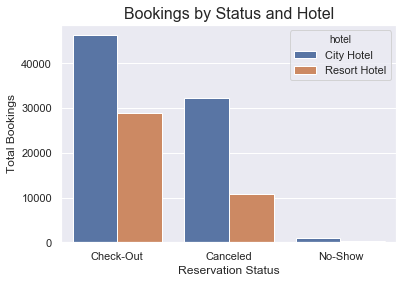

In [5]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
sns.countplot(x=raw_data['reservation_status'],data=raw_data, hue='hotel', hue_order=['City Hotel','Resort Hotel'])
plt.xlabel('Reservation Status', size=12)
plt.ylabel('Total Bookings', size=12)
plt.title('Bookings by Status and Hotel', size=16)
plt.show()

     A reasonably large proportion of bookings result in cancellation. Majority of which are linked to City Hotel

### Let's take a close look at the above statement

In [6]:
reservation_status=raw_data.is_canceled.map({1:'Cancelled',0:'Check-Out'}).value_counts().reset_index()
reservation_status

,index,is_canceled
0,Check-Out,75166
1,Cancelled,44224


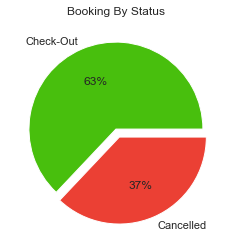

In [7]:
#Pie Chart in Python: https://plotly.com/python/pie-charts/
custom_colour = ['#48bf0d','#eb4034']#,'#e8ad23']
explode = (0, 0.1)  # only "explode" the 2nd slice
plt.pie(
        reservation_status['is_canceled'],
        labels=reservation_status['index'],
        autopct='%1.0f%%',
        explode=explode,
        colors=custom_colour
       )
plt.title('Booking By Status', fontsize=12)
plt.show()

             Cancellation accounts for 37 per cent of overall bookings.

In [8]:
cancelled_data = raw_data[(raw_data['reservation_status'] == 'Canceled')]
#cancelled_data.count()

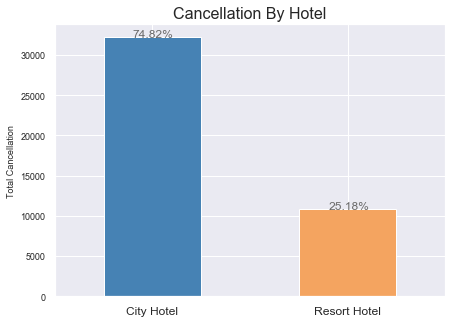

In [9]:
ax= cancelled_data['hotel'].value_counts().plot(kind='bar', figsize=(7,5),
                                                       color=['steelblue','sandybrown'], fontsize=9);
ax.set_alpha(0.8)
ax.set_title('Cancellation By Hotel', fontsize=16)
ax.set_ylabel('Total Cancellation', size=9)
plt.xticks(rotation=0,size=12)

# create a list to collect the plt.patches data
totals=[]

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
    
# set individual bar lables using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(i.get_x()+0.15,i.get_height()+1, \
            str(round((i.get_height()/total)*100,2))+'%', fontsize=12,
            color='dimgrey')

     3 out of 4 cancellations were linked to City Hotel.

## is cancellation rate high during certain periods?

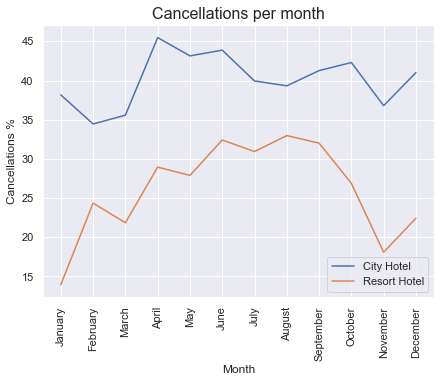

In [10]:
# get cancellation % by month
cancelled_perc = (pd.crosstab(cancelled_data.arrival_date_month,cancelled_data.hotel)
                /pd.crosstab(raw_data.arrival_date_month,raw_data.hotel)*100)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

# plot cancellation in % by month
ax = cancelled_perc.reindex(ordered_months).plot(kind="line" , legend=True,  figsize=(7, 5)
                                                )
ax.set_xticks(range(len(ordered_months)))
ax.set_xticklabels(ordered_months)
ax.set_xlabel("Month")
ax.set_ylabel("Cancellations %")
ax.legend(loc="lower right")
plt.title("Cancellations per month", fontsize=16)
plt.xticks(rotation=90)
plt.show()

      Cancellation rate is at its peak during holiday season (between June and September) for Resort Hotel.
      Whereas cancellation rate for City Hotel peaks in April, then gradually drops over the summer period.

### How about trend over the years?

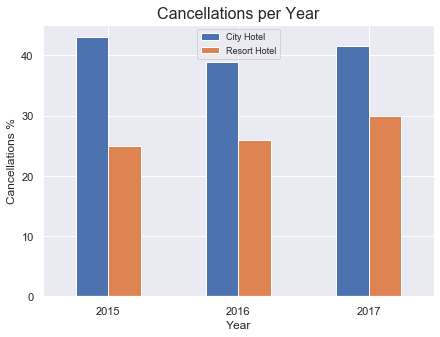

In [11]:
# get cancellation % by year
cancelled_perc_yr = (pd.crosstab(cancelled_data.arrival_date_year,cancelled_data.hotel)
                    /pd.crosstab(raw_data.arrival_date_year,raw_data.hotel)*100)

# plot cancellation rate by year
ax = cancelled_perc_yr.plot(kind="bar" , legend=True,  figsize=(7, 5)
                                                )
ax.set_xlabel("Year")
ax.set_ylabel("Cancellations %")
ax.legend(loc="upper center", fontsize=9)
plt.title("Cancellations per Year", fontsize=16)
plt.xticks(rotation=0)
plt.show()


   Around 40 per cent of City Hotel bookings resulted in cancellation, while the rate for Resort Hotel has steadily  increased between 2015 and 2017, from the rate of 25 per cent to 30 per cent.

### *** EDA with focus on features ***


#### This sub-section will explore the data with focus on features, the aim is to establish relevance and correlation with target value, thus determining whether it would be a good predictor.

In [12]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(raw_data)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Arrival_Date,Country_Name,Region,Region_Name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015,01/07/2015,Portugal,Europe,Southern Europe
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015,01/07/2015,Portugal,Europe,Southern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,07/09/2017,31/08/2017,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.2,0,2,Check-Out,07/09/2017,29/08/2017,Germany,Europe,Western Europe


#### What can we quickly find out about bookings and cancellations

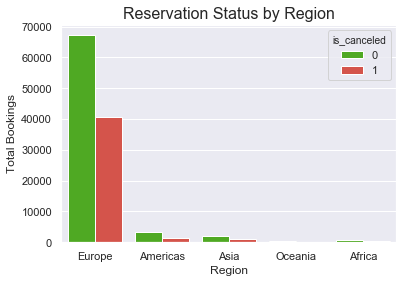

In [13]:
custom_colour = ['#48bf0d','#eb4034']

sns.countplot(x=raw_data['Region'],data=raw_data, hue='is_canceled', palette = custom_colour)
plt.xlabel('Region', size=12)
plt.ylabel('Total Bookings', size=12)
plt.title('Reservation Status by Region', size=16)
plt.show()

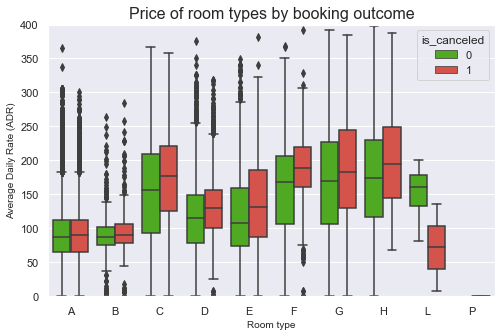

In [14]:
ordered_room_type = raw_data.reserved_room_type.unique()
ordered_room_type.sort()
custom_colour = ['#48bf0d','#eb4034']

plt.figure(figsize=(8, 5))
sns.boxplot(x='reserved_room_type'
           ,y='adr' 
           ,data=raw_data
           ,order=ordered_room_type
           ,hue='is_canceled'
           ,palette = custom_colour
           #fliersize=0,fliersize=0
           )
plt.title("Price of room types by booking outcome", fontsize=16)
plt.xlabel("Room type", fontsize=10)
plt.ylabel("Average Daily Rate (ADR)", fontsize=10)
plt.legend(loc="upper right", title='is_canceled')
plt.ylim(0, 400)
plt.show()



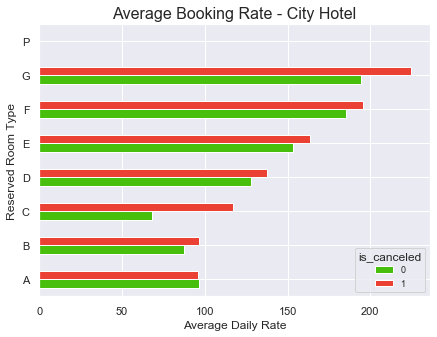

In [15]:
city_hotel_adr = pd.pivot_table(raw_data[(raw_data['hotel'] == 'City Hotel')], values='adr', index='reserved_room_type',columns='is_canceled', aggfunc=np.mean)

custom_colour = ['#48bf0d','#eb4034']

# plot cancellation rate by year
ax = city_hotel_adr.plot(kind="barh" , legend=True,  color=custom_colour, figsize=(7, 5)
                                                )
ax.set_xlabel("Average Daily Rate")
ax.set_ylabel("Reserved Room Type")
ax.legend(loc="lower right", fontsize=9, title='is_canceled')
plt.title("Average Booking Rate - City Hotel", fontsize=16)
plt.show()

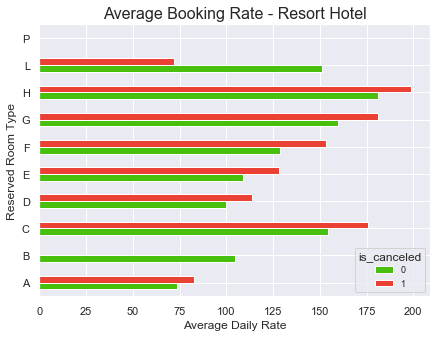

In [16]:
resort_hotel_adr = pd.pivot_table(raw_data[(raw_data['hotel'] == 'Resort Hotel')], values='adr', index='reserved_room_type',columns='is_canceled', aggfunc=np.mean)

custom_colour = ['#48bf0d','#eb4034']

# plot cancellation rate by year
ax = resort_hotel_adr.plot(kind="barh" , legend=True,  color=custom_colour, figsize=(7, 5)
                                                )
ax.set_xlabel("Average Daily Rate")
ax.set_ylabel("Reserved Room Type")
ax.legend(loc="lower right", fontsize=9, title='is_canceled')
plt.title("Average Booking Rate - Resort Hotel", fontsize=16)
plt.show()

   Bookings' average daily rate appears to be higher for bookings that resulted in cancellation across all but one room type (type A for City Hotel and Type L for Resort Hotel)

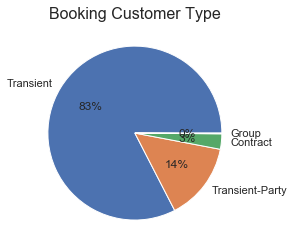

In [17]:
customer_type=raw_data[(raw_data['is_canceled']==1)]["customer_type"].value_counts().reset_index()
plt.pie(
        customer_type['customer_type'],
        labels=customer_type['index'],
        autopct='%1.0f%%'
       # explode=explode,
        #colors=custom_colour
       )
plt.title('Booking Customer Type', fontsize=16)
plt.show()

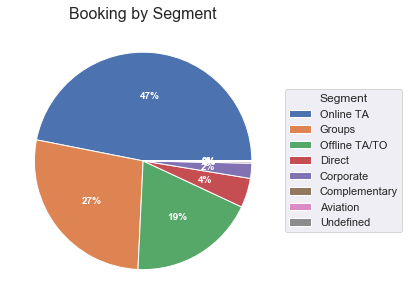

In [18]:
segments=raw_data[(raw_data['is_canceled']==1)]["market_segment"].value_counts().reset_index()

fig, ax = plt.subplots(figsize=(9, 5), subplot_kw=dict(aspect="equal"))



wedges, texts, autotexts = ax.pie(segments['market_segment'], autopct='%1.0f%%',
                                  textprops=dict(color="w"))

ax.legend(wedges, segments['index'],
          title="Segment",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

plt.title('Booking by Segment', fontsize=16)

plt.show()

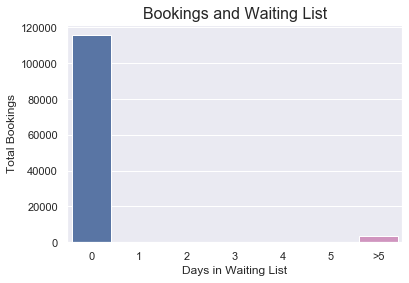

In [19]:

sns.countplot(x=np.where(raw_data['days_in_waiting_list'] > 5, '>5',raw_data['days_in_waiting_list'])
             ,data=raw_data
             #,hue='is_canceled'
             ,order=['0','1','2','3','4','5','>5']
             )
plt.title("Bookings and Waiting List", fontsize=16)
plt.xlabel('Days in Waiting List', size=12)
plt.ylabel('Total Bookings', size=12)
plt.show()

Just 3 per cent of bookings had to be placed on waiting list, with the minimum and maximum number of days in waiting list respectively being 39 and 183.

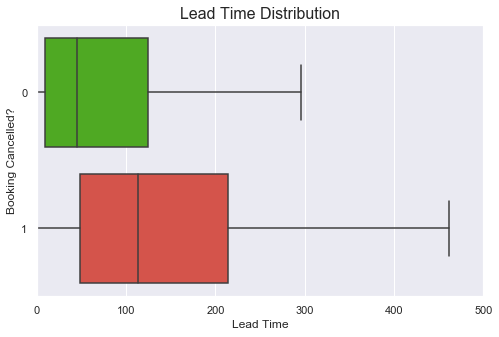

In [20]:
#ordered_room_type = raw_data.reserved_room_type.unique()
#ordered_room_type.sort()
custom_colour = ['#48bf0d','#eb4034']

plt.figure(figsize=(8, 5))
sns.boxplot(x='lead_time' 
           ,y='is_canceled' 
           ,data=raw_data
           ,palette = custom_colour
           ,fliersize=0
           ,orient='h'
           )
plt.title("Lead Time Distribution", fontsize=16)
plt.xlabel("Lead Time", fontsize=12)
plt.ylabel("Booking Cancelled?", fontsize=12)
plt.xlim(0, 500)
plt.show()

Lead time for cancelled booking is typically much higher compared to those of checked-in bookings.

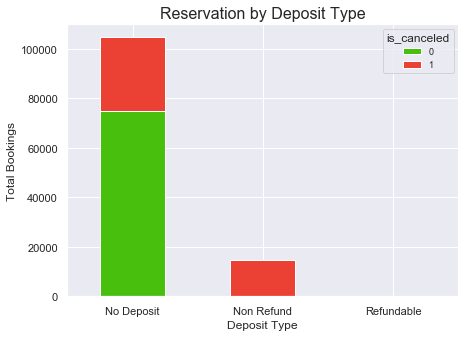

In [21]:
ax = pd.crosstab(raw_data.deposit_type,raw_data.is_canceled).plot(
                                                                  kind="bar" 
                                                                , legend=True
                                                                , color=custom_colour
                                                                ,  figsize=(7, 5)
                                                                ,stacked=True
                                                                 )
ax.set_xlabel("Deposit Type")
ax.set_ylabel("Total Bookings")
ax.legend(loc="upper right", fontsize=9, title='is_canceled')
plt.title("Reservation by Deposit Type", fontsize=16)
plt.xticks(rotation=0)
plt.show()

'No Deposit' booking is the most common with approx.87% of bookings associated with this deposit type, followed by 'Non refund'  with 12% of the overall bookings. Refundable booking is very uncommon with just 0.1% (or 162) of bookings linked to this deposit type.
The chart above indicates that all 'Non refund' bookings result in cancellation, and that there wasn't any 'Refundable' booking taken, which may not be the full picture due to the scale. Let's plot a similar graph but with the same scale for all three deposit type.

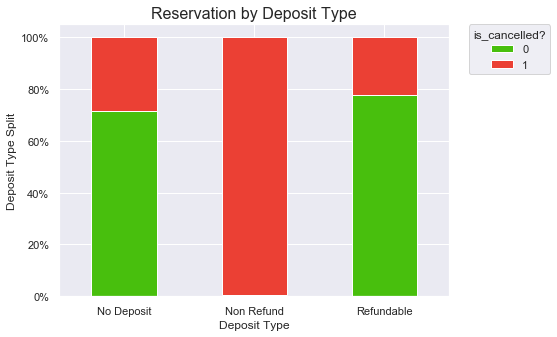

In [22]:
raw_data2 = raw_data.copy()
raw_data2['one'] = 1
ax = pd.pivot_table(raw_data2, values='one', index='deposit_type',columns='is_canceled', aggfunc=np.sum)

custom_colour = ['#48bf0d','#eb4034']

ax = ax.div(ax.sum(1), axis=0)
ax.plot(
        kind="bar" 
      , legend=True
      , color=custom_colour
      ,  figsize=(7, 5)
      , stacked=True
        )
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.xlabel('Deposit Type', size=12)
plt.ylabel('Deposit Type Split', size=12)
plt.legend(bbox_to_anchor=(1.05, 1), title='is_cancelled?', loc='upper left', borderaxespad=0.)
plt.title("Reservation by Deposit Type", fontsize=16)
plt.xticks(rotation=0)
plt.show()



The chart above confirms that nearly all 'Non refund' bookings result in cancellation (99.4%), Whereas, cancelled bookings account for just 28 per cent and 22 per cent of 'No deposit' and 'Refundable' booking types, respectively.

######  

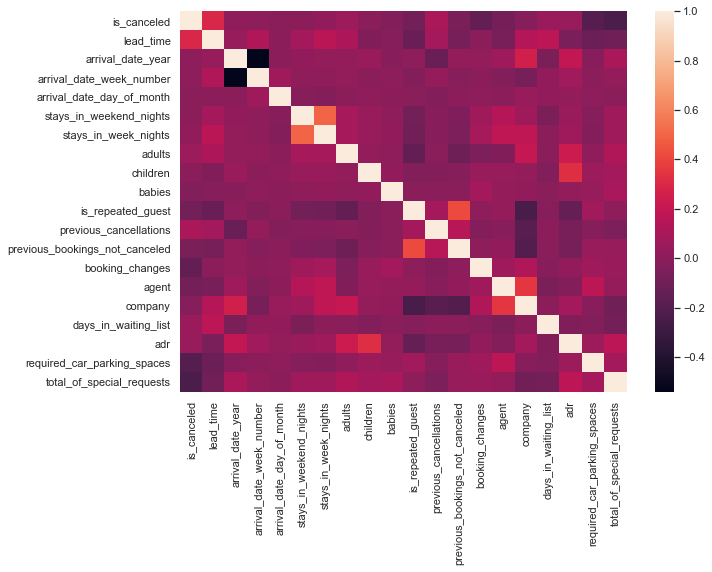

In [23]:
# Let's have a look at relationships within the dataset.
# The approach adopted here would allow a quick identification of important features for the model.
fig,axes = plt.subplots(1,1,figsize=(10,7))
sns.heatmap(raw_data.corr())
plt.show()

In [24]:
#Now a look at relationship of other features with target, with focus on numerical features.
cancel_corr = raw_data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

I was expecting daily rate (adr) to be one of (if not) the most important numerical feature. After taking a closer look however, adr isn't even included in the top 10 most important features.

######  

# 2. Data Cleanse and Preprocessing


Step 0: data cleaning, for example dealing with outliers and missing values 

Step 1: Balance the dataset (between cancelled and not cancelled), to get a split of around 50% 

Step 2: Split inputs and targets

Step 3: Standardise (non dummies) inputs 

Step 4: Shuffle the data (inputs & outputs)

Step 5: Split the dataset into train, validation, and test

Step 6: Save the three datasets in *.npz (for neural network)

### 2.1 Clean the dataset followed by preprocess

In [25]:
data = raw_data.copy()

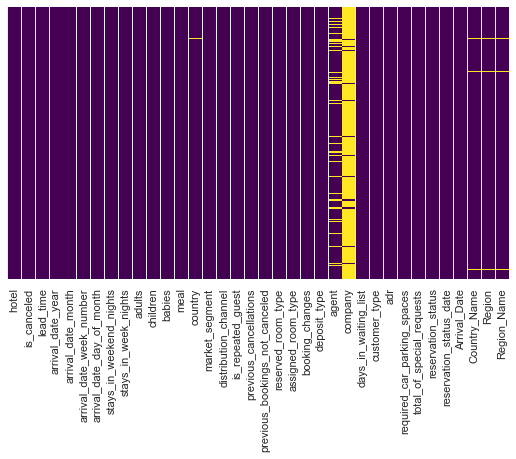

In [26]:
# inspect null values  and remove irrelevant columns
fig,axes = plt.subplots(1,1,figsize=(9,5))
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [27]:
# inspect null values again, but as a percentage of overall dataset
round((data.isnull().sum() / (data.isnull().sum()+data.count()))*100,2).sort_values(ascending=False)

company                           94.31
agent                             13.69
Region_Name                        1.48
Country_Name                       1.48
Region                             1.48
country                            0.41
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_week_nights               0.00
distribution_channel               0.00
stays_in_weekend_nights            0.00
arrival_date_day_of_month          0.00
arrival_date_week_number           0.00
arrival_date_month                 0.00
arrival_date_year                  0.00
lead_time                          0.00
is_canceled                        0.00
market_segment                     0.00
previous_cancellations             0.00
is_repeated_guest                  0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00


Given the fact that 94% of company field is null, it would be irrelevant and useless as a feature. agent field has also a high percentage of missing value, and the provided agent IDs provided do not provide valuable information. Therefore, it is best to remove these columns as they appear irrelevant as features.

#### The feature of 'Lead Time' had outliers, therefore it's best to deal with outliers before applying any model

In [28]:
# it appears that there are outliers situated around higher lead time (5% above 95th percentile), and it best to address this...
# some may decide to remove those outliers but these data will be kept here, by updating any value above 95th percentile
data.lead_time = np.where(data.lead_time > data.lead_time.quantile(0.95), data.lead_time.quantile(0.95),data.lead_time)
data.lead_time.describe(include='all')

count    119390.000000
mean        100.362065
std          96.587131
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         320.000000
Name: lead_time, dtype: float64

######  



Less than 1% of customers require more than 1 parking space, it's worth simplifying this feature by grouping this feature into two options: 

    those with a parking space requirement and those with none

In [29]:
data.required_car_parking_spaces = np.where(data.required_car_parking_spaces > 0,1,0)
data.groupby("required_car_parking_spaces")["required_car_parking_spaces"].value_counts()

required_car_parking_spaces  required_car_parking_spaces
0                            0                              111974
1                            1                                7416
Name: required_car_parking_spaces, dtype: int64

###### Removal of irrelevant numerical features

In [30]:
data = data.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','company','agent'], axis=1)

In [31]:
# Get a list of remaining/relevant numerical variables
[var for var in data.columns if data[var].dtypes!='object']

['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

The remaining of numerical fields will remain unchanged

#### Dealing with categorical data

Step 1: List variables and remove irrelevant ones.

Step 2: Create dummy variables.

In [32]:
#check for missing value again, in case we've missed any.
data.isna().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_month                   0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             4
babies                               0
meal                                 0
country                            488
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
days_in_waiting_list                 0
customer_type                        0
adr                                  0
required_car_parking_spaces          0
total_of_special_requests            0
reservation_status       

In [33]:
# Grouping nulls under 'Unspecified'
data.Region = np.where(data.Region.isna(),'Unspecified',data.Region)

In [34]:
# setting null to 0
data.children = np.where(data.children.isna(),0,data.children)

In [35]:
[var for var in data.columns if data[var].dtypes=='object']

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'Arrival_Date',
 'Country_Name',
 'Region',
 'Region_Name']

Removal of irrelevant categorical features

In [36]:
data = data.drop(['arrival_date_month','distribution_channel','reservation_status','reservation_status_date','Arrival_Date','Country_Name','country','Region_Name'], axis=1)


In [37]:
#Get a list of remaining/relevant categorical variables
[var for var in data.columns if data[var].dtypes=='object']

['hotel',
 'meal',
 'market_segment',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'Region']

#### Create dummy variables for retained categorical data

In [38]:
# create dummy variables for categorical data
data_inc_dummies = pd.get_dummies(data, drop_first=True)

In [39]:
with pd.option_context('display.max_rows', 15, 'display.max_columns', None): 
    display(data_inc_dummies)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,Region_Americas,Region_Asia,Region_Europe,Region_Oceania,Region_Unspecified
0,0,320.0,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,320.0,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,7.0,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,13.0,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,14.0,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23.0,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
119386,0,102.0,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
119387,0,34.0,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
119388,0,109.0,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [40]:
#Create checkpoint
data_preprocessed = data_inc_dummies.copy()

### 2.2 Balance the dataset

In [41]:
# Based on EDA, we're aware dataset isn't balanced. There are less cancelled bookings (37%) than non-cancelled bookings.
# Let's remind ourselves of the split again
data_preprocessed.is_canceled.sum()/data_preprocessed.is_canceled.shape[0]

0.37041628277075134

###### The aim is to have a "balanced" dataset, therefore some input/target pairs would have to be removed.

In [42]:
# First split data between cancelled and non-cancelled
cancelled_data_all = data_preprocessed[data_preprocessed.is_canceled == 1]
confirmed_data_all = data_preprocessed[data_preprocessed.is_canceled == 0]

In [43]:
# Next, determine the difference between the two subsets
to_remove = cancelled_data_all.shape[0] - confirmed_data_all.shape[0]

In [44]:
# Then, remove some data in non-cancelled data, equal to the difference between the two subsets
confirmed_data_all = confirmed_data_all[:to_remove]

In [45]:
print(confirmed_data_all.shape,confirmed_data_all.shape)

(44224, 57) (44224, 57)


In [46]:
# Finally, it's time to merge the subsets into a balanced dataset
balanced_dataset = pd.concat([cancelled_data_all, confirmed_data_all]
                             #, sort=True
                             #, ignore_index=True
                            )

# And confirm the dataset is balanced:
balanced_dataset.is_canceled.sum()/balanced_dataset.is_canceled.shape[0]

0.5

###### Split the dataset between inputs and targets

In [47]:
# Let's get a list of all columns, in order to rearrange them
balanced_dataset.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P',
       'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D',
       'assigned_room_type_E', 'assigned_

In [48]:
# Next, rearrange so that target variable is first in the list
balanced_dataset.columns = ['is_canceled', 'Region_Americas', 'Region_Asia', 'Region_Europe', 'Region_Oceania',
       'Region_Unspecified', 'adr', 'adults', 'assigned_room_type_B',
       'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E',
       'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_H',
       'assigned_room_type_I', 'assigned_room_type_K', 'assigned_room_type_L',
       'assigned_room_type_P', 'babies', 'booking_changes', 'children',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'days_in_waiting_list',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'hotel_Resort Hotel', 'is_repeated_guest', 'lead_time',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'previous_bookings_not_canceled',
       'previous_cancellations', 'required_car_parking_spaces',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P',
       'stays_in_week_nights', 'stays_in_weekend_nights',
       'total_of_special_requests']

with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(balanced_dataset)

,is_canceled,Region_Americas,Region_Asia,Region_Europe,Region_Oceania,Region_Unspecified,adr,adults,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,babies,booking_changes,children,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,days_in_waiting_list,deposit_type_Non Refund,deposit_type_Refundable,hotel_Resort Hotel,is_repeated_guest,lead_time,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_FB,meal_HB,meal_SC,meal_Undefined,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
8,1,85.0,0,3,2,0.0,0,0,0,0,0,0,82.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,1,75.0,0,3,2,0.0,0,0,0,0,0,0,105.5,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88400,0,36.0,2,2,3,0.0,0,0,0,0,0,0,159.3,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
88401,0,3.0,1,2,2,0.0,0,0,0,0,2,0,152.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [49]:
# Split inputs and targets data
inputs_unscaled = balanced_dataset.iloc[:,1:]
targets         = balanced_dataset.iloc[:,0]

### 2.3 Standardize the inputs


Note to self: in future, scale prior to adding dummy variables

In [50]:
# select the columns to omit (All dummy variables)
columns_to_omit = ['Region_Americas', 'Region_Asia', 'Region_Europe',
       'Region_Oceania', 'Region_Unspecified',
       'assigned_room_type_B', 'assigned_room_type_C',
       'assigned_room_type_D', 'assigned_room_type_E',
       'assigned_room_type_F', 'assigned_room_type_G',
       'assigned_room_type_H', 'assigned_room_type_I',
       'assigned_room_type_K', 'assigned_room_type_L',
       'assigned_room_type_P',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'hotel_Resort Hotel', 'is_repeated_guest',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'required_car_parking_spaces',
       'reserved_room_type_B', 'reserved_room_type_C',
       'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L',
       'reserved_room_type_P']

# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in inputs_unscaled.columns.values if x not in columns_to_omit]
columns_to_scale

['adr',
 'adults',
 'babies',
 'booking_changes',
 'children',
 'days_in_waiting_list',
 'lead_time',
 'previous_bookings_not_canceled',
 'previous_cancellations',
 'stays_in_week_nights',
 'stays_in_weekend_nights',
 'total_of_special_requests']

In [51]:
# Let's separate features to: 'to scale' (or numerical variables) and 'to omit' or (dummy variable)
inputs_to_omit = inputs_unscaled[columns_to_omit]

inputs_to_scale = inputs_unscaled[columns_to_scale]

# Let's observe the split, there should be a lot more columns to omit
print(inputs_to_omit.shape,inputs_to_scale.shape)

(88448, 44) (88448, 12)


In [52]:
# Now to standardise the inputs, since data of different magnitude (scale) can be biased towards high values.
# StandardScaler will be used here, to put all inputs in similar magnitude.
from sklearn.preprocessing import StandardScaler

# documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [53]:
scaler = StandardScaler()

In [54]:
# Scaling just numerical features
scaler.fit(inputs_to_scale)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
scaled_inputs = scaler.transform(inputs_to_scale)

In [56]:
scaled_inputs.shape

(88448, 12)

In [57]:
# Convert untouched data to a numpy array, then merge the two lists
untouched_inputs = inputs_to_omit.to_numpy()

inputs = np.concatenate((scaled_inputs,untouched_inputs), axis = 1)

inputs.shape

(88448, 56)

In [58]:
targets.shape

(88448,)

### 2.4 Split the data into train & test and shuffle

#### Import the relevant module

In [59]:
# import train_test_split so we can split our data into train and test
from sklearn.model_selection import train_test_split

In [60]:
# declare 4 variables for the split
# Setting an integer to random_state here to make the shuffle pseudo random, so that observations will always be shuffled in the same random way.

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

In [61]:
# check the shape of the train inputs and targets
print (x_train.shape, y_train.shape)

(70758, 56) (70758,)


In [62]:
# check the shape of the test inputs and targets
print (x_test.shape, y_test.shape)

(17690, 56) (17690,)


######  

# 3. Applying Bi-Predict Model(s)

## 3.1 Logistic Regression

In [63]:
# import the linear regression 'LogReg' model from sklearn
from sklearn.linear_model import LogisticRegression

# import the 'metrics' module, which includes important metrics
from sklearn import metrics

In [147]:
# create confusion matrix visualisation function.
# this function will create sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.4f}\nPrecision={:0.4}\nRecall={:0.4}\nF1 Score={:0.4}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.4f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

### 3.1.1 Training the model

In [64]:
# Create a logistic regression object
reg = LogisticRegression()

# Fit the train inputs
reg.fit(x_train,y_train)

# Assess the train accuracy of the model
reg.score(x_train,y_train)

/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8027078210237711

In [65]:
# save the names of the columns in an ad-hoc variable
a = pd.Series(inputs_to_omit.columns.values)
b = pd.Series(inputs_to_scale.columns.values)
feature_name = pd.concat([a,b], ignore_index= True)

In [66]:
# transpose the model coefficients (model.coef_) and throws them into a df (a vertical setup, so that they could be
# multiplied by certain matrices later) 
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

# add the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(reg.coef_)

# display the summary table
#summary_table

In [67]:
# save the names of the columns in an ad-hoc variable
a = pd.Series(inputs_to_omit.columns.values)
b = pd.Series(inputs_to_scale.columns.values)
feature_name = pd.concat([a,b], ignore_index= True)

# transpose the model coefficients (model.coef_) and throws them into a df (a vertical setup, so that they could be
# multiplied by certain matrices later) 
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

# add the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(reg.coef_)

# display the summary table
#summary_table

In [68]:
# Python trick to move the intercept to the top of the summary table
# move all indices by 1
summary_table.index = summary_table.index + 1

# add the intercept at index 0
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# sort the df by index
summary_table = summary_table.sort_index()

### 3.1.2 Interpreting the coefficients

In [69]:
# Create a new Series called: 'Odds ratio' which will show the.. odds ratio of each feature
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)


In [109]:
# Sort the table according to odds ratio
summary_table = summary_table.sort_values('Odds_ratio', ascending=False).reset_index(drop=True)

Text(0.5, 1.0, 'Feature Coefficients')

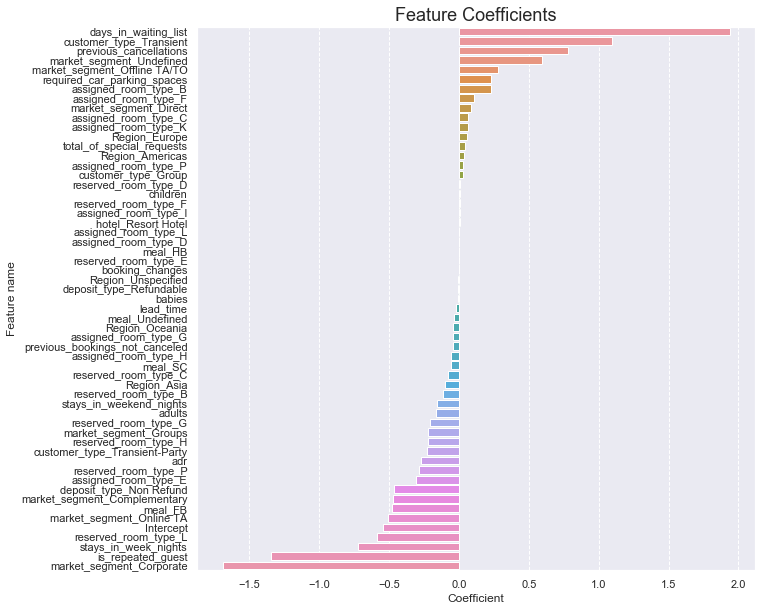

In [111]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Coefficient', y='Feature name', data=summary_table, ax=ax)
plt.title('Feature Coefficients', size = 18)

Text(0.5, 1.0, 'Feature Odds Ratio')

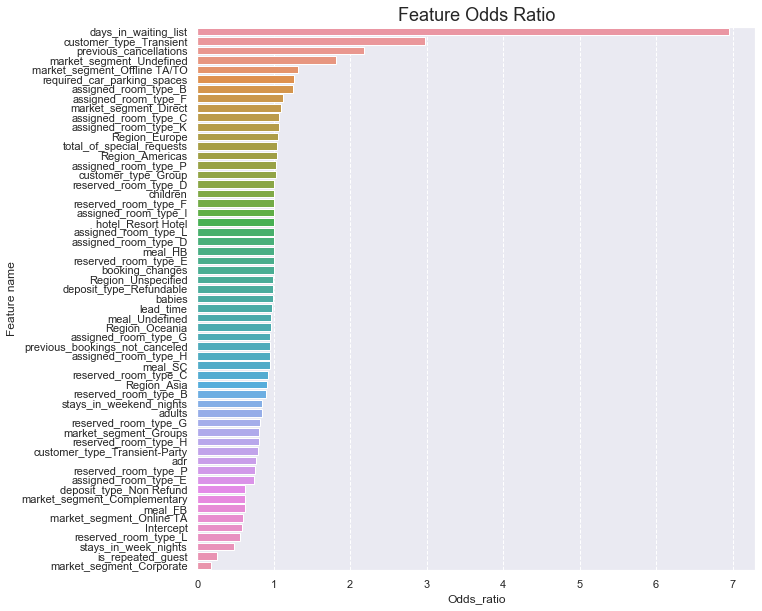

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Odds_ratio', y='Feature name', data=summary_table, ax=ax)
plt.title('Feature Odds Ratio', size = 18)

In [ ]:
summary_table

Given the context of this model, the charts/table above shows the weight/importance of each for each feature, with values close to 0 (regardless of being positive or negative) weighting less. In other words, When a feature coefficient is bigger, its corresponding feature is more important.

Therefore, a feature is not particularly important:

    *if its coefficient is around 0 (a weight of zero implies that no matter the feature value we will multiply it by 0 and the whole result will be zero.)
    
    *if its odd ratio is around 1 (For one unit change in the standardized feature the odds increase by a multiple equal to the odds ratio. So if the odds ratio is one then the odds don't change at all.)



The most important feature for this model is 'days spent in waiting list'. There isn't a direct interpretability of it due to the fact that it's a numerical feature that has been standardised. Its odds ratio implies that for
one standardised unit or for one standard deviation increase in days spent in waiting list, it's 7 times more likely to cancel their bookings. Which isn't much of a surpise as customer could and have the option to book elsewhere.

The second most important is 'Transient customers', which is dummy feature, therefore there is a direct interpretability. Its odds ratio implies that a transient customer is approximately 3 times more likely to cancel their bookings.

for weekends nights booked, which has a negative coefficient, it can be said that for one standardised unit or for one standard deviation increase in weekend booking, the odds ratio are (1-0.85) or 15% lower than the base model (no weekend stay), i.e. lower chance of cancelling.

 ##### We could proceed from here and perform backward elimination wherein useless features are removed from the model. This option is however optional as it makes very little or no difference to the model. It does however simplify the model by having a lower number of coefficients used.
 
 
 

### 3.1.3 Testing the model

In [130]:
cf_matrix = metrics.confusion_matrix(y_test, reg.predict(x_test))

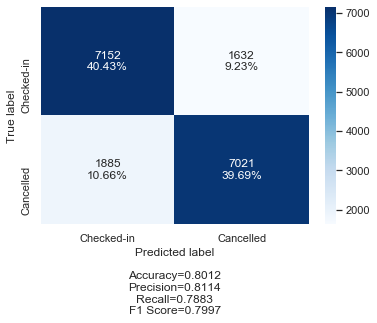

In [150]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Checked-in','Cancelled']
make_confusion_matrix(cf_matrix, 
                      #group_names=labels,
                      categories=categories, 
                      #percent=False,
                      cmap='Blues')

The regression model has learned to accurately predict 80% of the observations. in other words, it was able to accurately say whether a booking will be cancelled in future in 4 out of 5 cases. 


## 3.2 Neural Network

### 3.2.1 Splitting data for NN - Train, Validation, and Test

In [151]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.1, random_state = 20)

In [152]:
# train/validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, #train_size = 0.8, 
                                                                            test_size = 0.11, random_state = 20)

In [153]:
# check the shape of the train inputs and targets
print (x_train.shape, y_train.shape)

(70846, 56) (70846,)


In [154]:
# check the shape of the test inputs and targets
print (x_val.shape, y_val.shape)

(8757, 56) (8757,)


In [155]:
# check the shape of the test inputs and targets
print (x_test.shape, y_test.shape)

(8845, 56) (8845,)


In [156]:
x_train, x_val, x_test = x_train.astype(float), x_val.astype(float), x_test.astype(float)

In [157]:
# Save the three datasets in *.npz.

np.savez('Hotel_data_train', inputs=x_train, targets=y_train)
np.savez('Hotel_data_validation', inputs=x_val, targets=y_val)
np.savez('Hotel_data_test', inputs=x_test, targets=y_test)

In [158]:
npz = np.load('Hotel_data_train.npz')
train_inputs, train_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('Hotel_data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('Hotel_data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

### 3.2.2 Training the NN Model

Outline, optimizers, loss, early stopping and training

In [159]:
import tensorflow as tf

In [233]:
# Set the input and output sizes
input_size = 56
output_size = 2
# Use same hidden layer size for all hidden layers. Not a necessity.
hidden_layer_size = 800 
    
# Defining the model for the problem 
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    #tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3rd hidden layer 
    #tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'), # 4th hidden layer 
    #tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'), # 5th hidden layer 
    # the final layer is activated with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choosing the optimizer and the loss function:

# preferred optimizer to use is Adaptive Moment Estimation (adam) , as it's one of the best optimiser available.
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Training the model:

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# setting an early stopping mechanism, with patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # getting essential information about the training process
          )  

Train on 70846 samples, validate on 8757 samples
Epoch 1/100
70846/70846 - 2s - loss: 0.7486 - accuracy: 0.7673 - val_loss: 0.4504 - val_accuracy: 0.7980
Epoch 2/100
70846/70846 - 2s - loss: 0.3935 - accuracy: 0.8147 - val_loss: 0.3889 - val_accuracy: 0.8152
Epoch 3/100
70846/70846 - 2s - loss: 0.3701 - accuracy: 0.8222 - val_loss: 0.3852 - val_accuracy: 0.8123
Epoch 4/100
70846/70846 - 2s - loss: 0.3578 - accuracy: 0.8297 - val_loss: 0.3576 - val_accuracy: 0.8263
Epoch 5/100
70846/70846 - 2s - loss: 0.3480 - accuracy: 0.8331 - val_loss: 0.3437 - val_accuracy: 0.8364
Epoch 6/100
70846/70846 - 2s - loss: 0.3416 - accuracy: 0.8361 - val_loss: 0.3443 - val_accuracy: 0.8384
Epoch 7/100
70846/70846 - 2s - loss: 0.3343 - accuracy: 0.8398 - val_loss: 0.3394 - val_accuracy: 0.8380
Epoch 8/100
70846/70846 - 2s - loss: 0.3285 - accuracy: 0.8445 - val_loss: 0.3328 - val_accuracy: 0.8430
Epoch 9/100
70846/70846 - 2s - loss: 0.3244 - accuracy: 0.8451 - val_loss: 0.3327 - val_accuracy: 0.8458
Epoch 

After fine tuning the hyperparameters of the model, the validation accuracy was improved to 85 per cent.  

 

### 3.2.3 Test the model

The last step here is to test the final prediction power of the model by fitting it on the test dataset that the algorithm isn't familiar. As adjusting the hyperparameters after applying the model on test data would lead to overfitting. 

Consequently, this is the absolute final instance, because adjusting the model afterwards will start overfitting the test dataset and defeat its purpose.

In [234]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

8845/8845 [==============================] - 0s 27us/sample - loss: 0.3163 - accuracy: 0.8559


In [235]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.32. Test accuracy: 85.59%


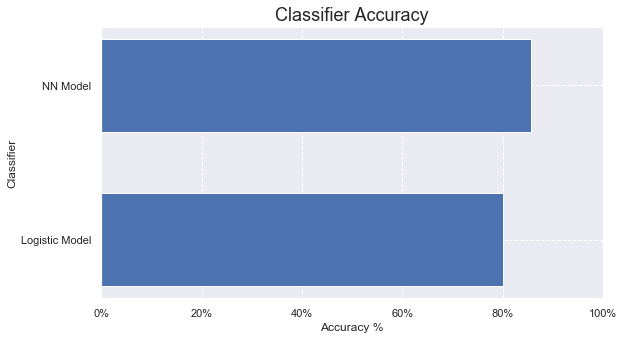

In [243]:
classifier = ['Logistic Model','NN Model']
accuracy = [0.8012,0.8559]

fig, ax = plt.subplots(figsize=(9,5))
plt.barh(classifier, accuracy, height = 0.6)
ax.set_xlim([0, 1])

plt.gca().set_xticklabels(['{:.0f}%'.format(accuracy*100) for accuracy in plt.gca().get_xticks()])
plt.xlabel('Accuracy %') 
plt.ylabel('Classifier') 
plt.title('Classifier Accuracy', size=18)
plt.show()

The final prediction power of NN model is 85.59 per cent, which is an improvement to the regression model with its final prediction power of 80.12 per cent.

To summarise this project, it all began by identifying a problem/setting objective, and the objective here was to be able to predict a booking final outcome given a customer profile.

The project started by conducting an exploratory data analysis, which allowed to gain a better understanding of the data by identifying the underlying trend within the data.

This was followed by preprocessing or (feature engineering) step, with the aim selecting appropriate features, and converting these features to a suitable format for applying model(s).

The final step was to select and apply Bi-predict models suitable for the problem of this project, which were Logistic Regression and Neural Network Models.

The concluding observation following the application of the models in here was that Neural Network model performed slightly better in comparison to Logistic Regression model when applied to new and unseen (test) dataset, with  prediction accuracy of just over 85 per cent (for Neural Network), while the Logistic Regression provided a prediction accuracy of just over 80 per cent.